In [99]:
import mglearn

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [101]:
citibike = mglearn.datasets.load_citibike()

In [102]:
citibike

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3h, Name: one, Length: 248, dtype: int64

In [103]:
citibike.index.min()
citibike.index.max()

Timestamp('2015-08-31 21:00:00')

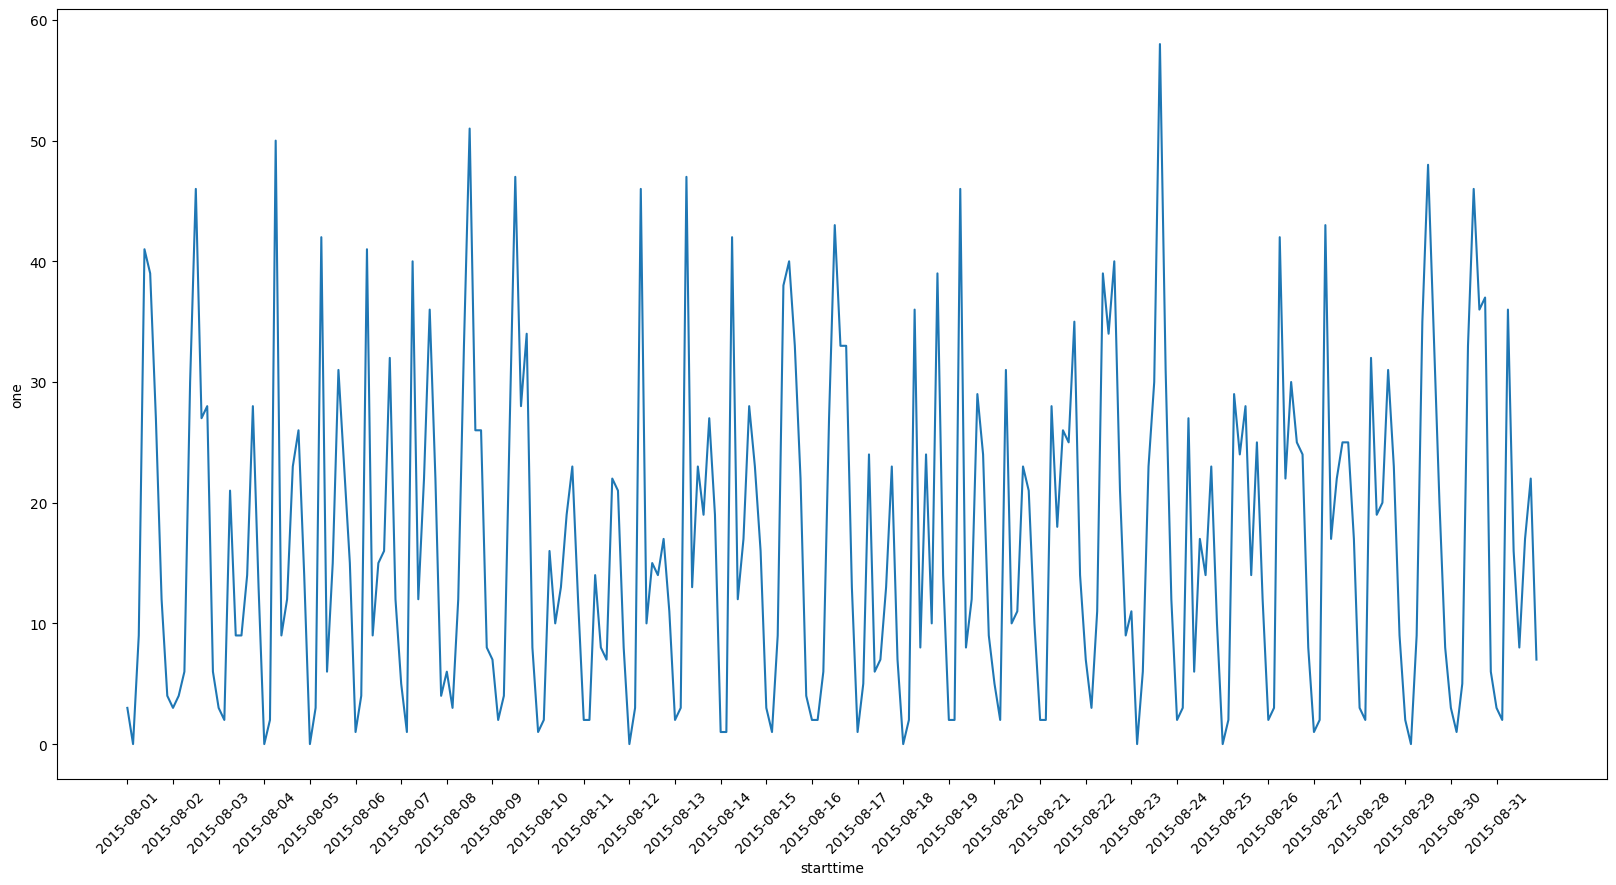

In [104]:
plt.figure(figsize=(20, 10))
sns.lineplot(citibike)
date_range = pd.date_range(citibike.index.min(), citibike.index.max())
plt.xticks(date_range, rotation=45)
plt.show()

In [105]:
y = citibike.to_numpy()
X = citibike.index.astype("int64").to_numpy().reshape(-1, 1) // 10**9  # これがナノ秒から秒に変換している
X

array([[1438387200],
       [1438398000],
       [1438408800],
       [1438419600],
       [1438430400],
       [1438441200],
       [1438452000],
       [1438462800],
       [1438473600],
       [1438484400],
       [1438495200],
       [1438506000],
       [1438516800],
       [1438527600],
       [1438538400],
       [1438549200],
       [1438560000],
       [1438570800],
       [1438581600],
       [1438592400],
       [1438603200],
       [1438614000],
       [1438624800],
       [1438635600],
       [1438646400],
       [1438657200],
       [1438668000],
       [1438678800],
       [1438689600],
       [1438700400],
       [1438711200],
       [1438722000],
       [1438732800],
       [1438743600],
       [1438754400],
       [1438765200],
       [1438776000],
       [1438786800],
       [1438797600],
       [1438808400],
       [1438819200],
       [1438830000],
       [1438840800],
       [1438851600],
       [1438862400],
       [1438873200],
       [1438884000],
       [14388

In [ ]:
n_train = 184

def eval_on_features(features, target, regressor):
    
    # train_test_split()を使うとランダムに切られてしまうため明示的に切る
    # 与えられた特徴量を訓練セットとテストセットに分割
    X_train, X_test = features[:n_train], features[n_train:]
    # ターゲットも分割する
    y_train, y_test = target[:n_train], target[n_train:]


    regressor.fit(X_train, y_train)
    print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")

    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)


    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), date_range.strftime("%a %m-%d"), rotation=90)

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, "-", label="test")
    plt.plot(range(n_train), y_pred_train, "--", label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, "--", label="prediction test")

    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")


Test-set R^2: -0.04


<Figure size 640x480 with 0 Axes>

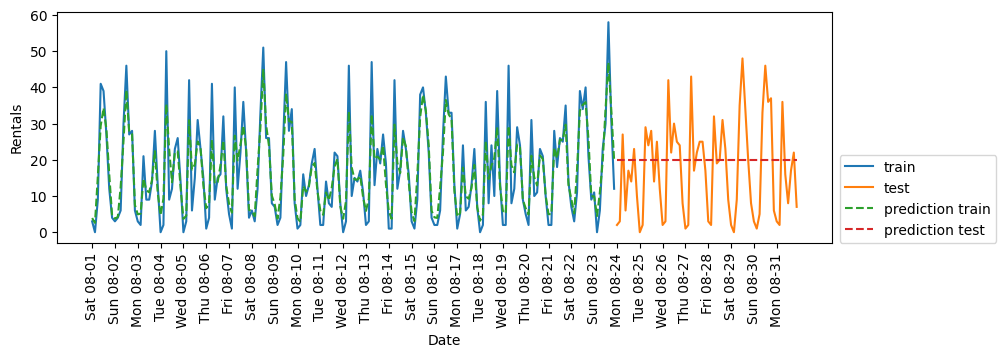

In [107]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


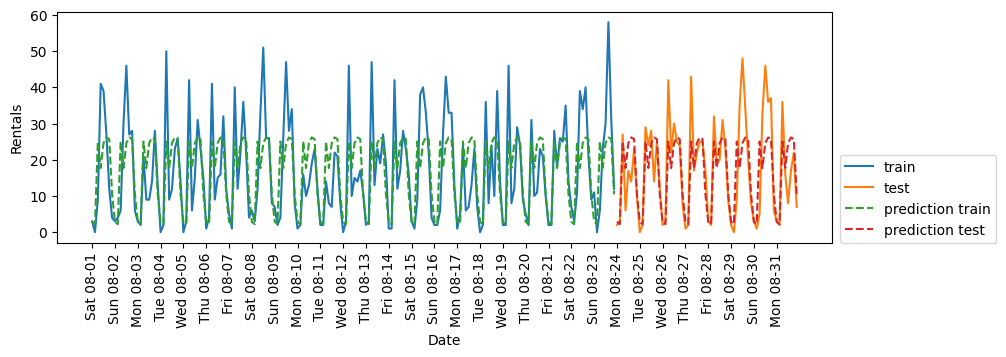

In [108]:
X_hour = citibike.index.hour.to_numpy().reshape(-1, 1)  # pandasのDateIndexからhourだけを取り出している
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


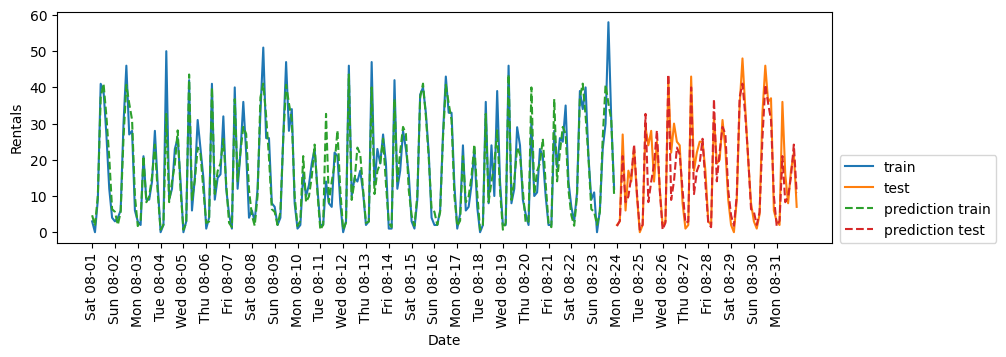

In [109]:
X_hour_week = np.hstack([citibike.index.dayofweek.to_numpy().reshape(-1, 1),  # dayofweekで曜日を取り出すことができる
                         citibike.index.hour.to_numpy().reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: -0.00


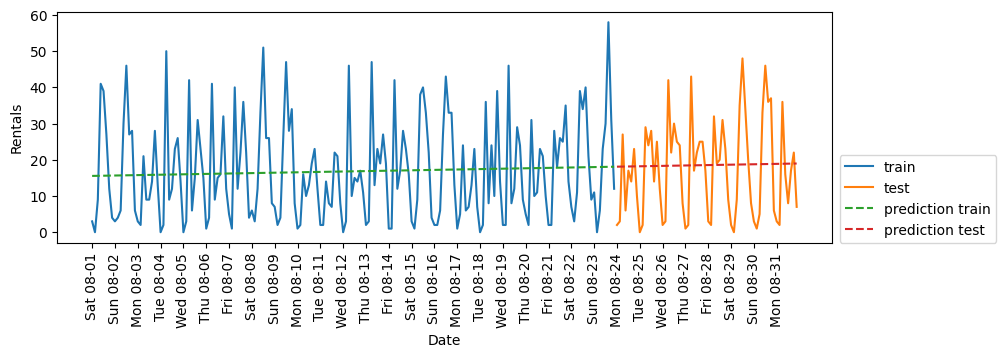

In [110]:
from sklearn.linear_model import LinearRegression

eval_on_features(X, y, LinearRegression())

In [124]:
print(X_hour[0])
X_hour_week.shape

[0]


(248, 2)

In [113]:
df_X_hour_week = pd.DataFrame({"date": X_hour_week[:, 0],
                               "hour": X_hour_week[:, 1]})
X_hour_week_onehot = pd.get_dummies(df_X_hour_week, columns=["date", "hour"])
X_hour_week_onehot.head()

,date_0,date_1,date_2,date_3,date_4,date_5,date_6,hour_0,hour_3,hour_6,hour_9,hour_12,hour_15,hour_18,hour_21
0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False


Test-set R^2: 0.62


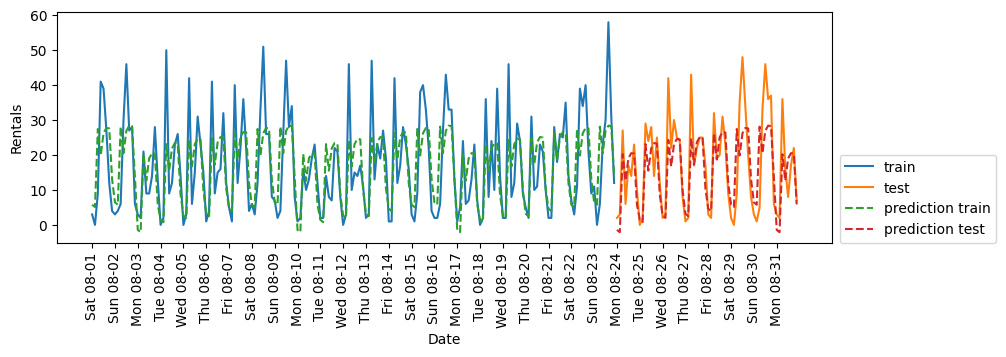

In [114]:
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


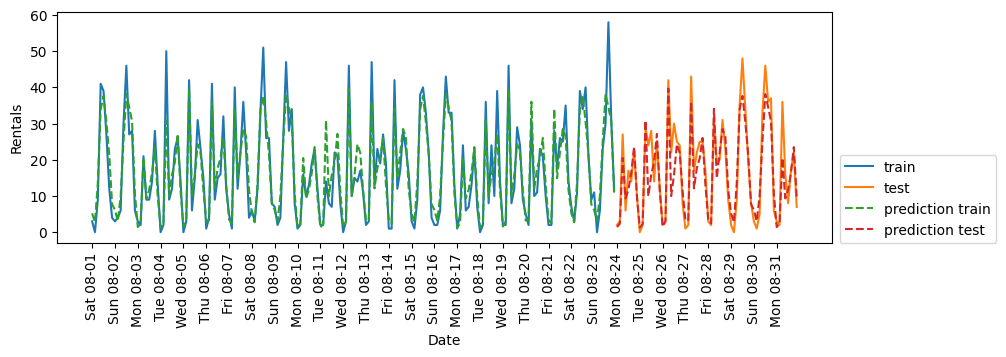

In [115]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)

X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [116]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [117]:
features_poly = poly_transformer.get_feature_names_out(X_hour_week_onehot.columns)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature magnitude')

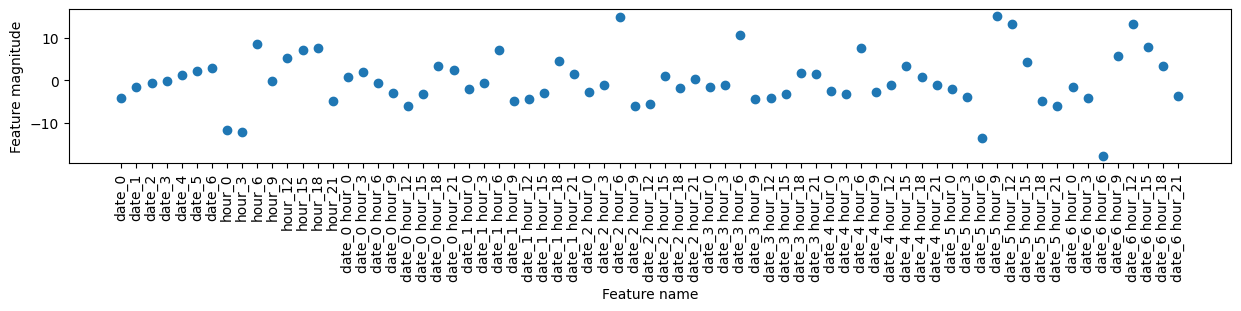

In [118]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, "o")
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

Test-set R^2: 0.60


<Axes: >

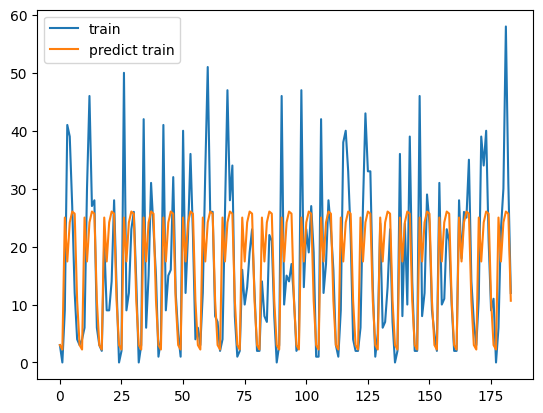

In [152]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# train_test_split()を使えないため自分でtrainとtestに分ける
X = pd.DatetimeIndex(citibike.index)
y = citibike.to_numpy()

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]


X_hour_train = X_train.hour.to_numpy().reshape(-1, 1)
X_hour_test = X_test.hour.to_numpy().reshape(-1, 1)

ran_forest = RandomForestRegressor().fit(X_hour_train, y_train)
print(f"Test-set R^2: {ran_forest.score(X_hour_test, y_test):.2f}")

y_train_pred = ran_forest.predict(X_hour_train)
y_test_pred = ran_forest.predict(X_hour_test)

sns.lineplot(x=range(n_train), y=y_train, label="train")
sns.lineplot(x=range(n_train), y=y_train_pred, label="predict train")

Test-set R^2: 0.84


<Axes: >

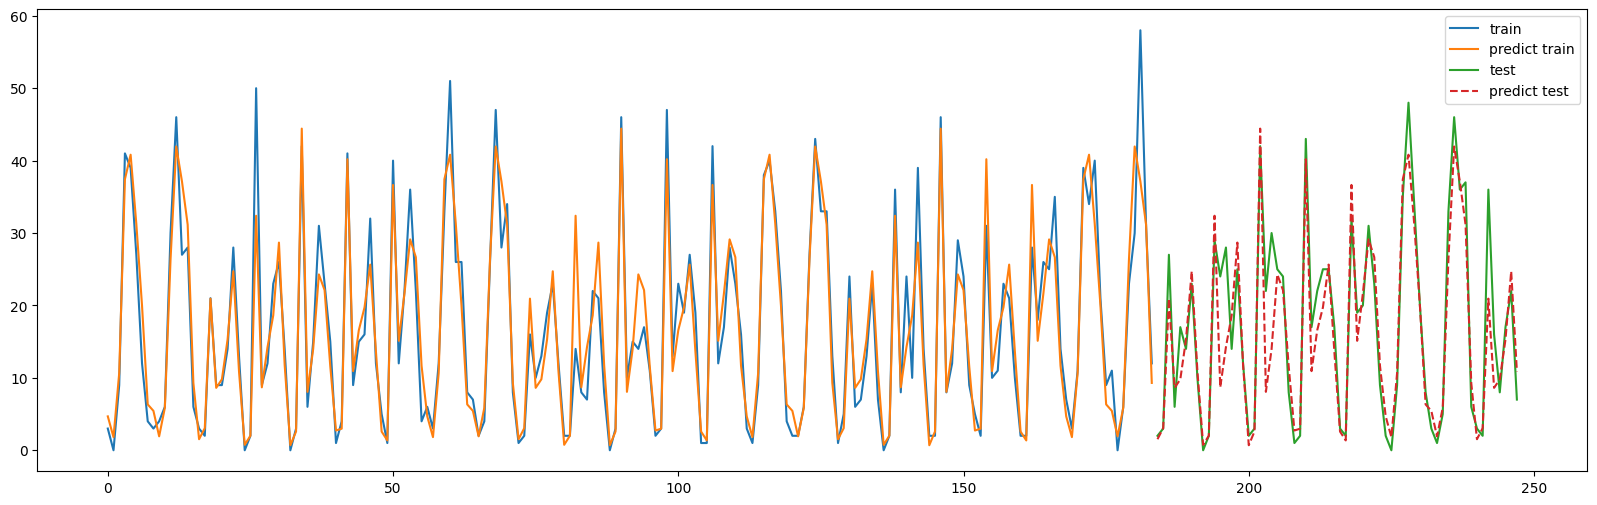

In [161]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# train_test_split()を使えないため自分でtrainとtestに分ける
X = pd.DatetimeIndex(citibike.index)
y = citibike.to_numpy()

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

X_hour_week_train = np.hstack([X_train.hour.to_numpy()[:, np.newaxis],
                          X_train.dayofweek.to_numpy()[:, np.newaxis]])
X_hour_week_test = np.hstack([X_test.hour.to_numpy()[:, np.newaxis],
                         X_test.dayofweek.to_numpy()[:, np.newaxis]]) 

ran_forest = RandomForestRegressor().fit(X_hour_week_train, y_train)
print(f"Test-set R^2: {ran_forest.score(X_hour_week_test, y_test):.2f}")

y_train_pred = ran_forest.predict(X_hour_week_train)
y_test_pred = ran_forest.predict(X_hour_week_test)

plt.figure(figsize=(20, 6))
sns.lineplot(x=range(n_train), y=y_train, label="train")
sns.lineplot(x=range(n_train), y=y_train_pred, label="predict train", linestyle="-")
sns.lineplot(x=range(n_train, n_train + y_test.shape[0]), y=y_test, label="test")
sns.lineplot(x=range(n_train, n_train + y_test.shape[0]), y=y_test_pred, label="predict test", linestyle="--")

Test-set R^2: 0.13


<Axes: >

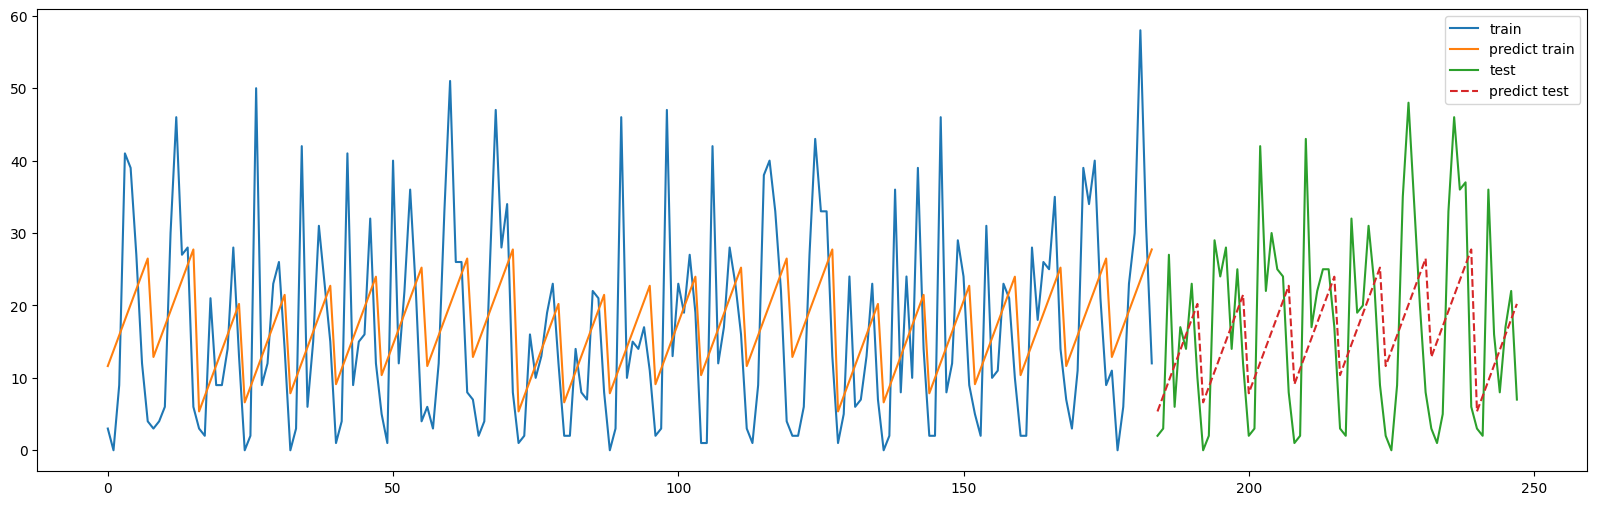

In [162]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# train_test_split()を使えないため自分でtrainとtestに分ける
X = pd.DatetimeIndex(citibike.index)
y = citibike.to_numpy()

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

X_hour_week_train = np.hstack([X_train.hour.to_numpy()[:, np.newaxis],
                          X_train.dayofweek.to_numpy()[:, np.newaxis]])
X_hour_week_test = np.hstack([X_test.hour.to_numpy()[:, np.newaxis],
                         X_test.dayofweek.to_numpy()[:, np.newaxis]]) 

ran_forest = Ridge().fit(X_hour_week_train, y_train)
print(f"Test-set R^2: {ran_forest.score(X_hour_week_test, y_test):.2f}")

y_train_pred = ran_forest.predict(X_hour_week_train)
y_test_pred = ran_forest.predict(X_hour_week_test)

plt.figure(figsize=(20, 6))
sns.lineplot(x=range(n_train), y=y_train, label="train")
sns.lineplot(x=range(n_train), y=y_train_pred, label="predict train", linestyle="-")
sns.lineplot(x=range(n_train, n_train + y_test.shape[0]), y=y_test, label="test")
sns.lineplot(x=range(n_train, n_train + y_test.shape[0]), y=y_test_pred, label="predict test", linestyle="--")

Test-set R^2: 0.85


<Axes: >

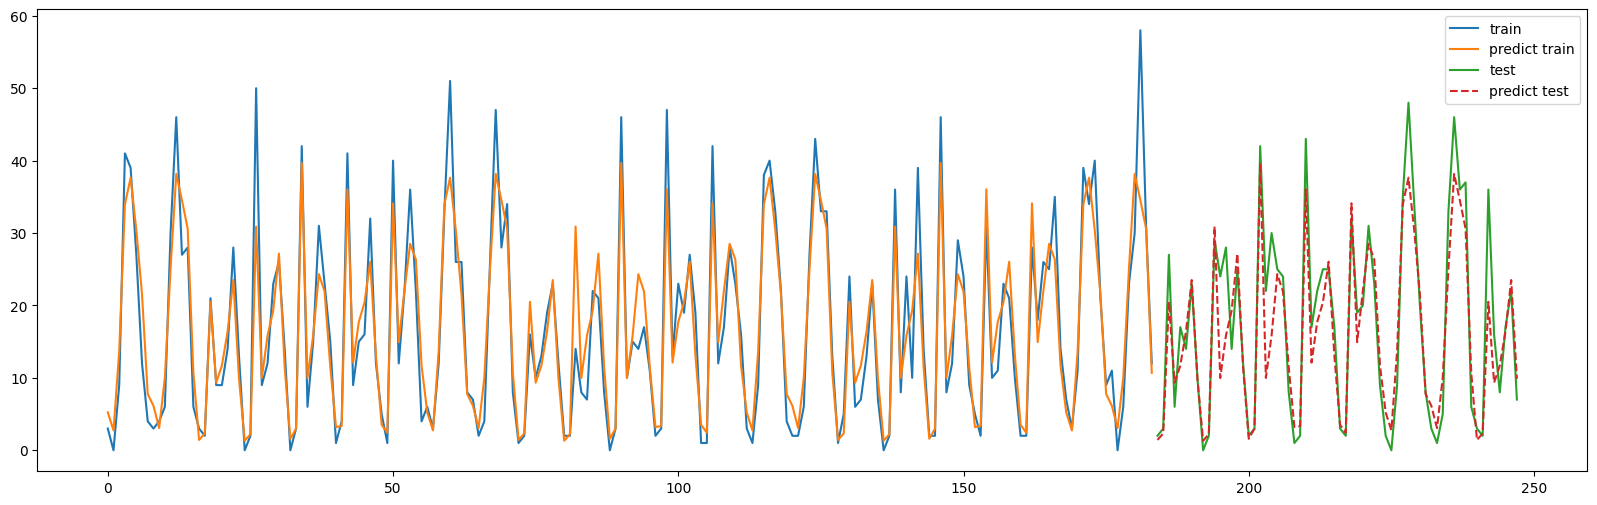

In [173]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# train_test_split()を使えないため自分でtrainとtestに分ける
X = pd.DatetimeIndex(citibike.index)
y = citibike.to_numpy()

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

X_hour_week_train = pd.concat([pd.Series(X_train.hour, name="hour"),
                               pd.Series(X_train.dayofweek, name="day")], axis=1)
X_hour_week_test = pd.concat([pd.Series(X_test.hour, name="hour"),
                              pd.Series(X_test.dayofweek, name="day")], axis=1) 


X_train_dummies = pd.get_dummies(X_hour_week_train, columns=["hour", "day"])
X_test_dummies = pd.get_dummies(X_hour_week_test, columns=["hour", "day"])

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly.fit(X_train_dummies)

X_train_poly = poly.transform(X_train_dummies)
X_test_poly = poly.transform(X_test_dummies)

ran_forest = Ridge().fit(X_train_poly, y_train)
print(f"Test-set R^2: {ran_forest.score(X_test_poly, y_test):.2f}")

y_train_pred = ran_forest.predict(X_train_poly)
y_test_pred = ran_forest.predict(X_test_poly)

plt.figure(figsize=(20, 6))
sns.lineplot(x=range(n_train), y=y_train, label="train")
sns.lineplot(x=range(n_train), y=y_train_pred, label="predict train", linestyle="-")
sns.lineplot(x=range(n_train, n_train + y_test.shape[0]), y=y_test, label="test")
sns.lineplot(x=range(n_train, n_train + y_test.shape[0]), y=y_test_pred, label="predict test", linestyle="--")